##  Cloning and Editing StoryMaps

In this guide we will walk through the process of cloning a storymap within our organization and to another organization. We will then edit the cloned story and copy selective content elements from the cloned story to the original story. We have a separate [Introduction to StoryMaps](../introduction-to-storymaps) guide that covers the various content elements that can be added to a StoryMap.

In [1]:
from arcgis.gis import GIS
from arcgis.apps import storymap
from arcgis.apps.storymap import StoryMap, Themes, Cover
from arcgis.apps.storymap.story_content import Image, Image360

In [2]:
gis = GIS(profile='your_online_profile')

We fetch the StoryMap item we would like to clone. 

In [6]:
storymap_item = gis.content.get('7860d45d35f6455193576933206d8352')

https://storymaps.arcgis.com/stories/7860d45d35f6455193576933206d8352
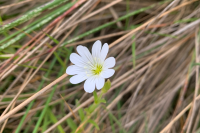

In [7]:
my_story = StoryMap(storymap_item)
my_story

### Duplicating a StoryMap

The `duplicate()` method supported specifically for `StoryMap` items lets you create a copy or _shallow_ clone of your StoryMap. It retains the structure, text and layout of the original story but does not clone the items within the original story and retains references to the maps, layers, and other items from the original story. The `duplicate()` method is a powerful way to create a copy of your story within the __same organization__. 

<Item title:"Duplicated nature story 1" type:StoryMap owner:MMajumdar_geosaurus>
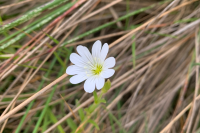

In [6]:
duplicated_story = my_story.duplicate("Duplicated nature story 1")
duplicated_story

On the other hand, if you wish to clone this story while also cloning the deep dependencies (e.g., maps, layers, tables) from the original story, you will need to use the [`clone_items()` method](https://developers.arcgis.com/python/latest/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.clone_items) of the ArcGIS API for Python. 

This technique is particularly potent to clone the StoryMap and its dependencies to another organization, as shown in the example that follows. 

#### Cloning to ArcGIS Enterprise

In [8]:
gis_enterprise = GIS(profile='your_enterprise_profile')

In [9]:
cloned_story_ent = gis_enterprise.content.clone_items([storymap_item])
cloned_story_ent

[<Item title:"Nature WebMap" type:Web Map owner:mmajumdar>,
 <Item title:"Nature Themed Story" type:StoryMap owner:mmajumdar>]

`clone_items()` has successfully cloned both the the StoryMap and Web Map items to the target ArcGIS Enterprise organization. 

### Editing the StoryMap

We will now make edits to certain aspects of our cloned story. You can make edits to update the branding elements of the Storymap, as we will see below. 

Additionally, you can make edits to update the content elements. This can be particularly useful when you have a template Storymap and you want to clone it to retain the structure and layout but only update the text or maps or media within the story.

In [9]:
cloned_storymap = StoryMap(cloned_story_online[1])

In [10]:
img = Image("https://www.nps.gov/npgallery/GetAsset/69680c29-caa3-42da-93d9-32925e9ed409/proxy/hires")

#### Cover

The cover is what you see at the start of your StoryMap. This cover can set the visual tone of the StoryMap.

We will update necessary attributes for the cover.

In [11]:
cover = cloned_storymap.contents[0]
cover.title = "Nature Story"
cover.summary = "Nature themed StoryMap"
cover.byline = "Python Story"
cover.media = img

<Item title:"Nature Themed Story" type:StoryMap owner:MMajumdar_geosaurus>
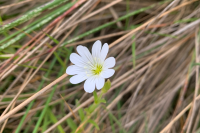

In [13]:
cloned_storymap.save()

Having saved this story, we now see the cover updated.

![updated_cover](https://github.com/user-attachments/assets/a439a9be-2154-4e87-9262-6551cbe2aa5e)

#### Logo

Similarly you can also update the logo of the story.

In [15]:
cloned_storymap.set_logo('D:/Github Projects/geosaurus/tests/resources/storymap/storymap_image_river.jpg')

True

#### Theme

Theme sets the visual style and appearance of the StoryMap. ArcGIS StoryMaps supports the following themes:

![themes](https://github.com/user-attachments/assets/8f1cc448-cc6a-4e87-8734-7351d04a9e47)

The ArcGIS API for Python supports these themes through type enumerations which include:
* `SUMMIT` = "summit"
* `OBSIDIAN` = "obsidian"
* `RIDGELINE` = "ridgeline"
* `MESA` = "mesa"
* `TIDAL` = "tidal"
* `SLATE` = "slate"

You can fetch and update the theme of your story as shown below.

In [16]:
cloned_storymap.get_theme()

'summit'

In [17]:
cloned_storymap.theme(Themes.OBSIDIAN)

<Themes.OBSIDIAN: 'obsidian'>

It is necessary to save the `StoryMap` to see our changes reflect there.

<Item title:"Nature Themed Story" type:StoryMap owner:MMajumdar_geosaurus>
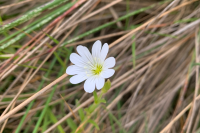

In [18]:
cloned_storymap.save()

The theme of the story has been successfully updated.

![theme_update](https://github.com/user-attachments/assets/3cfcc0bd-1039-4d8c-9dc6-73497dbf424c)

#### Credits

Credits represent the attribution section in a story. Credits are found at the end of the story and thus are always the last node.

In [19]:
cloned_storymap.credits(content="Nature story" , attribution="ArcGIS API for Python", heading="Nature themed story", description="Generated through Python")

['n-9087a8']

In [10]:
my_story.credits(content="Nature story" , attribution="ArcGIS API for Python", heading="Nature themed story", description="Generated through Python")

['n-GYl04j', 'n-386ede', 'n-477910']

<Item title:"Nature Themed Story" type:StoryMap owner:MMajumdar_geosaurus>
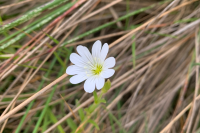

In [20]:
cloned_storymap.save()

This has successfully updated the credits towards the end of the story.

![credits](https://github.com/user-attachments/assets/bfde90a6-fb4b-44ce-82d6-55f44e887db1)

#### Editing text

Let us look at a final example where we update some text within the cloned story.

We identify the particular content element with text we would like to update by providing the index of that content element to the `contents` property of the StoryMap.

In [28]:
content = cloned_storymap.contents[3]
content.text

'Nature themed story'

In [31]:
content.text = 'Flora and Fauna story'

<Item title:"Nature Themed Story" type:StoryMap owner:MMajumdar_geosaurus>
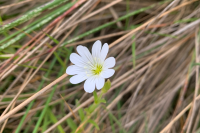

In [32]:
cloned_storymap.save()

![updated_text](https://github.com/user-attachments/assets/43c111ab-a5fd-47f7-b68a-55e8e7665f37)

#### Adding a new map to my Storymap

We now fetch the map item that we would like to include in this story. Having imported the `storymap` submodule previously, we can directly access the `Map` class within it, specific for StoryMap content, as shown below. 

You can learn more about the other supported StoryMap content elements from [this introductory guide](../introduction-to-storymaps). 

In [37]:
map1 = gis.content.get('7f39672ef7f6469db7b2bbd383349fc1')
map1_for_storymap = storymap.Map(map1)

In [39]:
cloned_storymap.add(content = map1_for_storymap, caption = "Natural Beauty in UK", position = 4)

True

<Item title:"Nature Themed Story" type:StoryMap owner:MMajumdar_geosaurus>
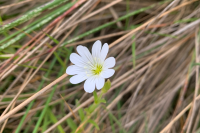

In [41]:
cloned_storymap.save()

![map](https://github.com/user-attachments/assets/dd855eb3-e202-44d7-bf39-a7784b1e46bc)

### Copy selective content over to a another Storymap

The ArcGIS API for Python also allows for copying selective sections of a StoryMap over to another using the [`copy_content()`](https://developers.arcgis.com/python/latest/api-reference/arcgis.apps.storymap.html#arcgis.apps.storymap.story.StoryMap.copy_content) method if you do not wish to clone all the content of a StoryMap. 

This capability can be beneficial in a few cases. 
1. You may have cloned an existing story, updated it with a few more content elements and would like to copy those over back to the original StoryMap.
2. You may already have another StoryMap item that you would like to update with content from your existing StoryMap, without cloning it and creating another item.

We will explore the second use-case through an example below. 

Note: If you wish to copy all the content elements of a StoryMap, you need to ensure that you are not copying the `Cover`, `Navigation` and `Credits` of one story over to another. We will see how to remove those elements before copying below.

In [51]:
content = cloned_storymap.contents[2:]
content

[Image360(image='storymap_image_river.jpg'),
 Text(text=Flora and Fauna story),
 Map(item='7f39672ef7f6469db7b2bbd383349fc1', type='Web Map'),
 Image(image='https://www.nps.gov/npgallery/GetAsset/69680c29-caa3-42da-93d9-32925e9ed409/proxy/hires'),
 ImageGallery(num_images=3),
 Separator(),
 Audio(path='rocks.mp3'),
 Video(path='https://www.youtube.com/embed/8wY14zHDmEs'),
 Sidecar(num_slides=1),
 Swipe(type='image'),
 'Credits']

Filtering the contents from index 2 and onwards removes the `Cover` and `Navigation`. We now remove the `Credits`. 

In [52]:
content.pop(-1)

'Credits'

We fetch the StoryMap to which we would like to content copy over.

In [55]:
python_story = gis.content.get('2c1eb8f9a4c44b3ea6ed2af554f394a2')
python_storymap = StoryMap(python_story)
python_storymap

https://storymaps.arcgis.com/stories/2c1eb8f9a4c44b3ea6ed2af554f394a2

In [54]:
cloned_storymap.copy_content(target_story = python_storymap, node_list = content)

True

Ensure that you save the `target_story` after copying content into it for the changes to reflect in the story. 

In [56]:
python_storymap.save()

<Item title:"StoryMap via Python" type:StoryMap owner:MMajumdar_geosaurus>